In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Create prior training dataset

## Create a dataframe from fasta

In [ ]:
import pandas as pd
from Bio import SeqIO

def get_df_from_fasta(data_path):
    fasta_sequences = SeqIO.parse(open(data_path),'fasta')
    names, seqs = [], []

    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        names.append(name)
        sequence = sequence.replace("-", "").upper()
        seqs.append(sequence)

    print(f"Total number of sequences: {len(seqs)}")
    df = pd.DataFrame({'name':names, 'sequence': seqs})
    return df

In [11]:
fasta_path = 'data/round1/dry-lab/prior/PF00082.25.fasta'
subtilisin_data = get_df_from_fasta(fasta_path)
subtilisin_data['sequence'] = subtilisin_data.sequence.str.upper()
subtilisin_data['length'] = subtilisin_data.sequence.str.len()
subtilisin_data.to_csv(fasta_path+".csv", index=False)

Total number of sequences: 62667


## Filter sequences by length

In [12]:
df_path = fasta_path+".csv"

subtilisin_data = pd.read_csv(df_path)
print(subtilisin_data.length.median(), subtilisin_data.length.quantile(0.05), subtilisin_data.length.quantile(0.95))
subtilisin_filtered = subtilisin_data[(subtilisin_data.length<=478.0) & (subtilisin_data.length>=127.0)] # 5%, 95% percentile
subtilisin_filtered.to_csv(df_path+'-filtered.csv', index=False)

len(subtilisin_filtered)

279.0 127.0 478.0


56623

## Plot length distributions

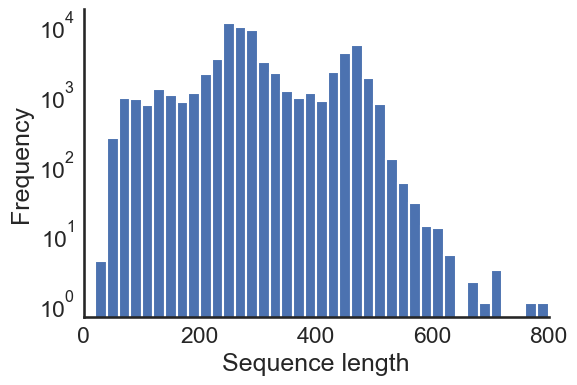

In [15]:
from utils import plot_style_utils
import os

plot_style_utils.set_pub_plot_context(context="talk")

fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

min_x, max_x, binwidth = 0, 800, 20
bins=range(min_x, max_x + binwidth, binwidth)

ax.hist(subtilisin_data.length, bins=bins)

ax.set_xlabel("Sequence length")
ax.set_ylabel("Frequency")
ax.set_xlim(0, 800)
ax.set_yscale('log')

os.makedirs("figures/round1", exist_ok=True)
plot_style_utils.save_for_pub(fig, path='figures/round1/prior_length_hist')

## Split into train & test

In [16]:
from sklearn.model_selection import train_test_split

prior_data_path = 'data/round1/dry-lab/prior/subtilisin'

# split data and save
df_train, df_test = train_test_split(subtilisin_filtered, test_size=0.1)
df_train.to_csv(prior_data_path+'-train.csv', index=False)
df_test.to_csv(prior_data_path+'-test.csv', index=False)
len(df_train), len(df_test)

(50960, 5663)